##### Análise de Clusters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb    

In [32]:
# Carregar datasets
olist_orders = pd.read_csv("../data/raw/olist_orders_dataset.csv")
olist_order_items = pd.read_csv("../data/raw/olist_order_items_dataset.csv")
olist_customers = pd.read_csv("../data/raw/olist_customers_dataset.csv")

olist_products = pd.read_csv("../data/raw/olist_products_dataset.csv")
olist_reviews = pd.read_csv("../data/raw/olist_order_reviews_dataset.csv")
olist_geolocation = pd.read_csv("../data/raw/olist_customers_dataset.csv")

customer_cluster = pd.read_csv("../data/processed/customers_clusters.csv")

In [11]:
customers = customer_cluster.merge(olist_customers, how="inner", on="customer_unique_id")
customers_orders = customers.merge(olist_orders, how="inner", on="customer_id")
customers_orders_items = customers_orders.merge(olist_order_items, how="inner", on="order_id")
customers_products = customers_orders_items.merge(olist_products, how="inner", on="product_id")
customers_reviews = customers_orders.merge(olist_reviews, how="inner", on="order_id")

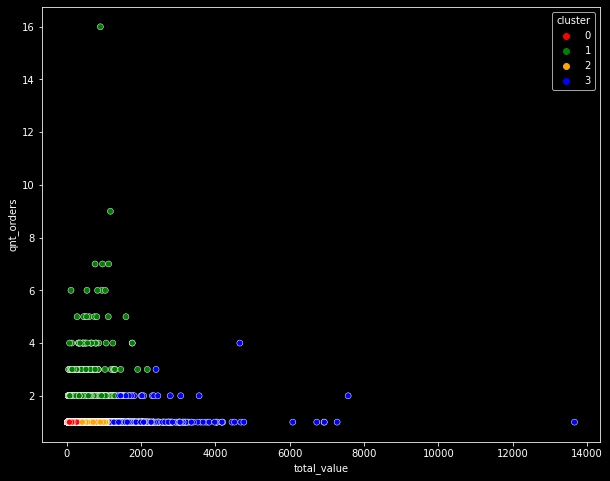

In [34]:
# Recapitulando os clusters
plt.figure(figsize= (10, 8))
ax = sb.scatterplot(x= 'total_value', y='qnt_orders', hue='cluster', data= customer_cluster, palette= ['red', 'green', 'orange', 'blue'])
plt.show()

##### Cluster 2 - Clientes com maior faturamento

In [9]:
customers_products[customers_products.cluster == 2].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,1381.000000,1381.000000,1381.000000,1381.0,1381.000000,1381.000000,1381.000000,1381.000000,1363.000000,1363.000000,1363.000000,1380.000000,1380.000000,1380.000000,1380.000000
mean,47484.322954,1938.153497,1.155684,2.0,43139.583635,2.317161,1026.813519,55.246387,49.450477,1461.187821,2.413059,8027.207246,40.389130,29.108696,30.947101
std,28223.467797,1237.964456,0.503270,0.0,30669.536406,2.641514,839.651600,54.518232,9.031492,1085.208811,1.743974,8736.558681,23.468462,19.621245,16.027739
min,132.000000,1146.200000,1.000000,2.0,1020.000000,1.000000,32.000000,0.070000,14.000000,83.000000,1.000000,50.000000,14.000000,2.000000,11.000000
25%,22806.000000,1344.820000,1.000000,2.0,14640.000000,1.000000,219.900000,24.020000,43.000000,569.500000,1.000000,922.000000,20.000000,15.000000,18.000000
50%,47465.000000,1628.070000,1.000000,2.0,36033.000000,1.000000,1099.000000,38.510000,52.000000,1158.000000,2.000000,3517.500000,34.000000,22.000000,26.000000
75%,72650.000000,2067.420000,1.000000,2.0,74825.000000,3.000000,1460.000000,64.250000,56.000000,1973.000000,4.000000,13350.000000,53.000000,40.000000,40.000000
max,94978.000000,13664.080000,4.000000,2.0,99615.000000,20.000000,6735.000000,409.680000,63.000000,3992.000000,10.000000,30000.000000,105.000000,105.000000,100.000000


In [10]:
customers_products[customers_products.cluster == 2].product_category_name.value_counts()

informatica_acessorios                            145
pcs                                               131
beleza_saude                                      106
automotivo                                         99
relogios_presentes                                 99
moveis_escritorio                                  91
moveis_decoracao                                   75
esporte_lazer                                      54
ferramentas_jardim                                 50
utilidades_domesticas                              44
construcao_ferramentas_construcao                  44
instrumentos_musicais                              42
bebes                                              38
eletroportateis                                    38
telefonia                                          34
cama_mesa_banho                                    30
eletrodomesticos_2                                 26
telefonia_fixa                                     24
agro_industria_e_comercio   

In [20]:
customers_reviews[customers_reviews.cluster == 2].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,review_score
count,863.000000,863.000000,863.000000,863.0,863.000000,863.000000
mean,47638.340672,1804.701298,1.085747,2.0,42049.611819,3.931634
std,27837.817064,862.092247,0.336584,0.0,30133.158287,1.519008
min,132.000000,1146.200000,1.000000,2.0,1020.000000,1.000000
25%,23756.000000,1328.335000,1.000000,2.0,14480.000000,3.000000
50%,46929.000000,1544.760000,1.000000,2.0,35450.000000,5.000000
75%,71008.000000,2023.945000,1.000000,2.0,70031.500000,5.000000
max,94978.000000,13664.080000,4.000000,2.0,99615.000000,5.000000


##### Cluster 1 - Clientes com maior quantidade de pedidos

In [21]:
customers_products[customers_products.cluster == 1].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,7274.000000,7274.000000,7274.000000,7274.0,7274.000000,7274.000000,7274.000000,7274.000000,7177.000000,7177.000000,7177.000000,7271.000000,7271.000000,7271.000000,7271.000000
mean,47524.771515,331.005388,2.243745,1.0,33499.409128,1.269453,94.978627,18.505913,48.946774,725.245367,2.048210,1844.904965,30.148810,15.413561,23.159813
std,26964.376345,264.107489,0.945718,0.0,29781.154638,0.751539,99.254283,12.393608,9.989457,633.706110,1.596633,3444.674664,15.967035,12.282548,11.680527
min,106.000000,35.940000,2.000000,1.0,1005.000000,1.000000,2.900000,0.000000,10.000000,4.000000,1.000000,50.000000,11.000000,2.000000,6.000000
25%,24403.500000,158.190000,2.000000,1.0,9470.000000,1.000000,36.850000,12.690000,42.000000,317.000000,1.000000,261.000000,18.000000,8.000000,15.000000
50%,47482.000000,249.900000,2.000000,1.0,22750.000000,1.000000,67.900000,15.855000,52.000000,544.000000,1.000000,650.000000,25.000000,12.000000,20.000000
75%,70483.000000,409.700000,2.000000,1.0,50940.000000,1.000000,119.000000,19.700000,57.000000,903.000000,3.000000,1600.000000,38.000000,20.000000,30.000000
max,94937.000000,2164.400000,16.000000,1.0,99750.000000,11.000000,1199.900000,196.940000,66.000000,3956.000000,15.000000,30000.000000,105.000000,105.000000,118.000000


In [22]:
customers_products[customers_products.cluster == 1].product_category_name.value_counts()

cama_mesa_banho                  1105
moveis_decoracao                  779
esporte_lazer                     672
beleza_saude                      550
informatica_acessorios            526
                                 ... 
fashion_roupa_infanto_juvenil       1
pcs                                 1
artigos_de_festas                   1
pc_gamer                            1
portateis_casa_forno_e_cafe         1
Name: product_category_name, Length: 69, dtype: int64

In [23]:
customers_reviews[customers_reviews.cluster == 1].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,review_score
count,6459.000000,6459.000000,6459.000000,6459.0,6459.000000,6459.000000
mean,47396.792538,301.577266,2.237034,1.0,33950.793312,4.166899
std,27003.203375,239.063446,0.961322,0.0,29774.746584,1.304760
min,106.000000,35.940000,2.000000,1.0,1005.000000,1.000000
25%,24388.000000,147.130000,2.000000,1.0,9750.000000,4.000000
50%,46912.000000,227.240000,2.000000,1.0,22790.000000,5.000000
75%,70442.500000,367.860000,2.000000,1.0,53545.000000,5.000000
max,94937.000000,2164.400000,16.000000,1.0,99750.000000,5.000000


##### Cluster 0 - Clientes com menor faturamento

In [24]:
customers_products[customers_products.cluster == 0].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,91719.000000,91719.000000,91719.0,91719.0,91719.000000,91719.000000,91719.00000,91719.000000,90342.000000,90342.000000,90342.000000,91705.000000,91705.000000,91705.000000,91705.000000
mean,47544.056302,115.159174,1.0,0.0,34684.595853,1.132143,81.64111,17.979551,48.756005,758.154956,2.208840,1655.080421,29.215463,15.543776,22.321106
std,27418.633517,67.245133,0.0,0.0,29791.530315,0.499181,57.63711,10.292469,10.077216,621.708364,1.728378,2818.438346,15.397474,12.175841,11.064597
min,0.000000,9.590000,1.0,0.0,1003.000000,1.000000,0.85000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,7.000000
25%,23763.500000,61.110000,1.0,0.0,11040.000000,1.000000,36.99000,12.790000,42.000000,341.000000,1.000000,250.000000,18.000000,8.000000,15.000000
50%,47597.000000,100.540000,1.0,0.0,24110.000000,1.000000,65.00000,15.800000,52.000000,589.000000,1.000000,600.000000,24.000000,12.000000,20.000000
75%,71313.500000,157.710000,1.0,0.0,57443.500000,1.000000,112.49000,19.500000,57.000000,947.000000,3.000000,1583.000000,36.000000,20.000000,29.000000
max,94982.000000,307.140000,1.0,0.0,99990.000000,21.000000,296.50000,215.430000,76.000000,3988.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [25]:
customers_products[customers_products.cluster == 0].product_category_name.value_counts()

cama_mesa_banho                  9188
beleza_saude                     7772
esporte_lazer                    7191
moveis_decoracao                 6619
informatica_acessorios           6247
                                 ... 
la_cuisine                          9
fashion_roupa_infanto_juvenil       7
pc_gamer                            5
seguros_e_servicos                  2
pcs                                 1
Name: product_category_name, Length: 73, dtype: int64

In [26]:
customers_reviews[customers_reviews.cluster == 0].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,review_score
count,82360.000000,82360.000000,82360.0,82360.0,82360.000000,82360.000000
mean,47488.965287,110.246682,1.0,0.0,34814.968128,4.127453
std,27425.318392,65.328564,0.0,0.0,29784.434879,1.306979
min,0.000000,9.590000,1.0,0.0,1003.000000,1.000000
25%,23720.750000,58.000000,1.0,0.0,11060.000000,4.000000
50%,47501.500000,95.100000,1.0,0.0,24220.000000,5.000000
75%,71216.250000,150.040000,1.0,0.0,58037.000000,5.000000
max,94982.000000,307.140000,1.0,0.0,99990.000000,5.000000


##### Cluster 3

In [27]:
customers_products[customers_products.cluster == 3].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,11759.000000,11759.000000,11759.0,11759.0,11759.000000,11759.000000,11759.000000,11759.000000,11662.000000,11662.000000,11662.000000,11759.000000,11759.000000,11759.000000,11759.000000
mean,47561.258781,509.592520,1.0,3.0,38888.469853,1.529467,331.994636,32.480331,48.865289,978.320357,2.299177,4970.144740,36.276384,23.964708,27.211498
std,27463.059637,199.637777,0.0,0.0,30030.546482,1.150428,224.271930,27.851894,9.687110,743.541056,1.738480,6479.308863,18.968331,18.572107,14.405049
min,7.000000,307.160000,1.0,3.0,1006.000000,1.000000,11.500000,0.000000,5.000000,4.000000,1.000000,0.000000,8.000000,2.000000,6.000000
25%,23970.000000,356.105000,1.0,3.0,13201.000000,1.000000,149.900000,17.000000,42.000000,438.000000,1.000000,600.000000,20.000000,11.000000,16.000000
50%,47783.000000,432.360000,1.0,3.0,29200.000000,1.000000,299.900000,22.350000,51.000000,758.000000,2.000000,1750.000000,30.000000,17.000000,22.000000
75%,71684.500000,616.410000,1.0,3.0,65902.000000,2.000000,429.000000,38.390000,57.000000,1273.000000,3.000000,7350.000000,47.000000,30.000000,35.000000
max,94977.000000,1143.220000,1.0,3.0,99930.000000,15.000000,1199.900000,312.410000,64.000000,3976.000000,14.000000,30000.000000,105.000000,105.000000,105.000000


In [28]:
customers_products[customers_products.cluster == 3].product_category_name.value_counts()

beleza_saude              1210
relogios_presentes         939
informatica_acessorios     864
moveis_decoracao           829
cama_mesa_banho            775
                          ... 
dvds_blu_ray                 2
pc_gamer                     2
livros_importados            1
fashion_esporte              1
artes_e_artesanato           1
Name: product_category_name, Length: 66, dtype: int64

In [29]:
customers_reviews[customers_reviews.cluster == 3].describe()

,Unnamed: 0,total_value,qnt_orders,cluster,customer_zip_code_prefix,review_score
count,8451.000000,8451.000000,8451.0,8451.0,8451.000000,8451.000000
mean,47510.205893,503.957536,1.0,3.0,39313.609159,3.963200
std,27422.199924,196.844871,0.0,0.0,29890.033997,1.452505
min,7.000000,307.160000,1.0,3.0,1006.000000,1.000000
25%,23873.500000,352.785000,1.0,3.0,13218.000000,3.000000
50%,47575.000000,426.010000,1.0,3.0,30180.000000,5.000000
75%,71476.500000,609.270000,1.0,3.0,65703.500000,5.000000
max,94977.000000,1143.220000,1.0,3.0,99930.000000,5.000000
